In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("simulation_data/smart_sp_rp/smart_sp_rp.csv", index_col=0)
df.head()

,skull_thershold,raise_thershold,win_count_score,win_count_elim
0,0.0,0.000000,1232.0,3.0
1,0.0,0.111111,1381.0,5.0
2,0.0,0.222222,1664.0,16.0
3,0.0,0.333333,1928.0,37.0
4,0.0,0.444444,2319.0,81.0


In [3]:
df["total_wins"] = df["win_count_score"] + df["win_count_elim"]

In [4]:
df_select = df[["skull_thershold", "raise_thershold", "total_wins"]]

df_select["total_wins"] = df_select["total_wins"] / 100

heatmap_data = df_select.pivot(index='raise_thershold', columns='skull_thershold', values='total_wins')


/var/folders/j0/5vzg02dn3ln14ntm75wgfw140000gn/T/ipykernel_34822/288756182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["total_wins"] = df_select["total_wins"] / 100


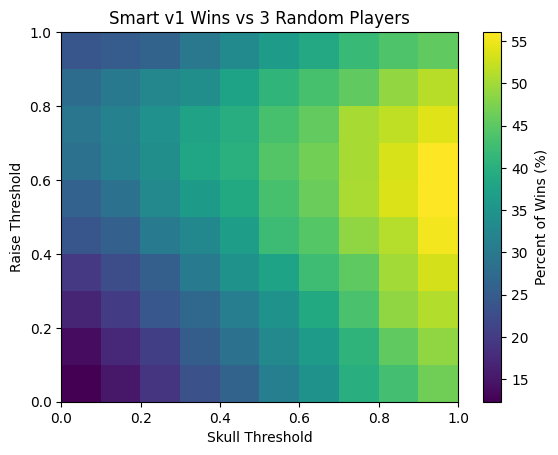

In [6]:
data_array = heatmap_data.values
plt.imshow(data_array, origin='lower', aspect='auto', cmap='viridis',
           extent=[df_select['skull_thershold'].min(), df_select['skull_thershold'].max(), df_select['raise_thershold'].min(), df_select['raise_thershold'].max()])
plt.colorbar(label='Percent of Wins (%)')
plt.xlabel("Skull Threshold")
plt.ylabel("Raise Threshold")
plt.title("Smart v1 Wins vs 3 Random Players")
plt.show()

In [7]:
df_select[df_select["total_wins"] == max(df_select["total_wins"])]

,skull_thershold,raise_thershold,total_wins
95,1.0,0.555556,56.06


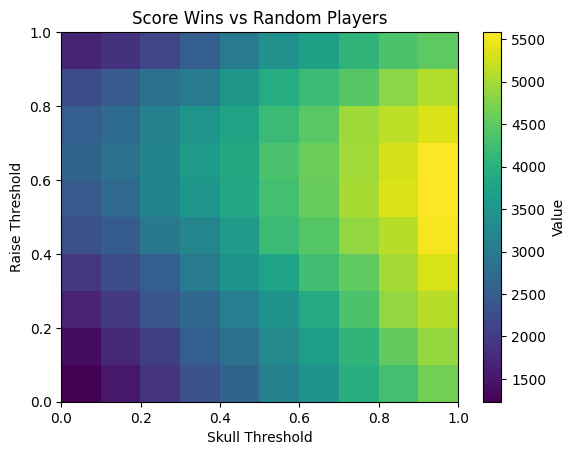

In [35]:
df_select = df[["skull_thershold", "raise_thershold", "win_count_score"]]
heatmap_data = df_select.pivot(index='raise_thershold', columns='skull_thershold', values='win_count_score')

data_array = heatmap_data.values
plt.imshow(data_array, origin='lower', aspect='auto', cmap='viridis',
           extent=[df_select['skull_thershold'].min(), df_select['skull_thershold'].max(), df_select['raise_thershold'].min(), df_select['raise_thershold'].max()])
plt.colorbar(label='Value')
plt.xlabel("Skull Threshold")
plt.ylabel("Raise Threshold")
plt.title("Score Wins vs Random Players")
plt.show()

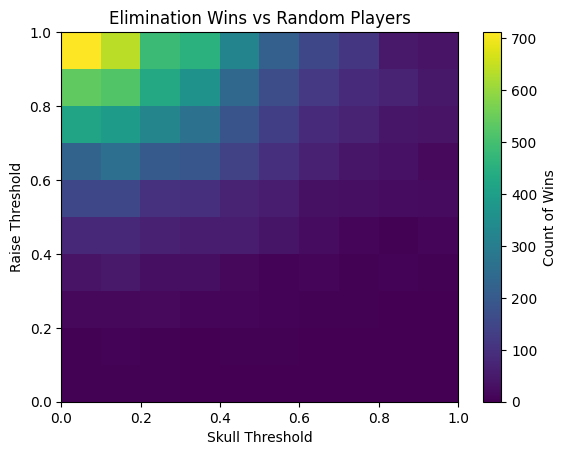

In [36]:
df_select = df[["skull_thershold", "raise_thershold", "win_count_elim"]]
heatmap_data = df_select.pivot(index='raise_thershold', columns='skull_thershold', values='win_count_elim')

data_array = heatmap_data.values
plt.imshow(data_array, origin='lower', aspect='auto', cmap='viridis',
           extent=[df_select['skull_thershold'].min(), df_select['skull_thershold'].max(), df_select['raise_thershold'].min(), df_select['raise_thershold'].max()])
plt.colorbar(label='Count of Wins')
plt.xlabel("Skull Threshold")
plt.ylabel("Raise Threshold")
plt.title("Elimination Wins vs Random Players")
plt.show()

In [37]:
df[df["total_wins"] == max(df["total_wins"])]

,skull_thershold,raise_thershold,win_count_score,win_count_elim,total_wins
95,1.0,0.555556,5584.0,22.0,5606.0


In [38]:
df[df["win_count_elim"] == max(df["win_count_elim"])]

,skull_thershold,raise_thershold,win_count_score,win_count_elim,total_wins
9,0.0,1.0,1688.0,712.0,2400.0


In [39]:
fixed_raise_df = df[abs(df["raise_thershold"] - 0.66666667) < 0.01]

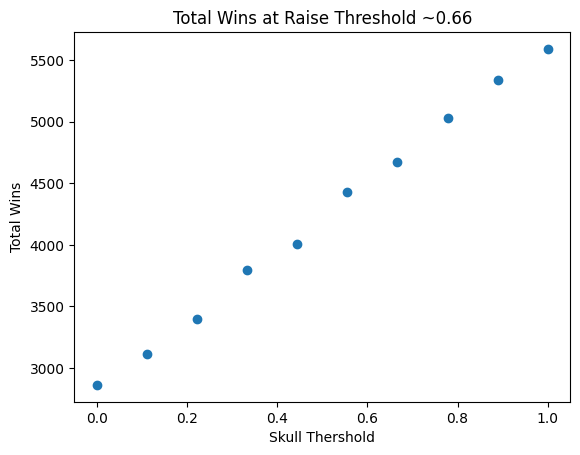

In [40]:
plt.scatter(fixed_raise_df["skull_thershold"], fixed_raise_df["total_wins"])
plt.xlabel("Skull Thershold")
plt.ylabel("Total Wins")
plt.title("Total Wins at Raise Threshold ~0.66")
plt.show()